![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

# QUESTIONS
## 1. Which hour has the highest frequency of crimes?
## 2. Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)?
## 3. Identify the number of crimes committed against victims of different age groups.

In [3]:

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("C:/Users/USER/Downloads/Crime data/workspace/crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [4]:
crimes["TIME OCC"] = crimes["TIME OCC"].astype(int)

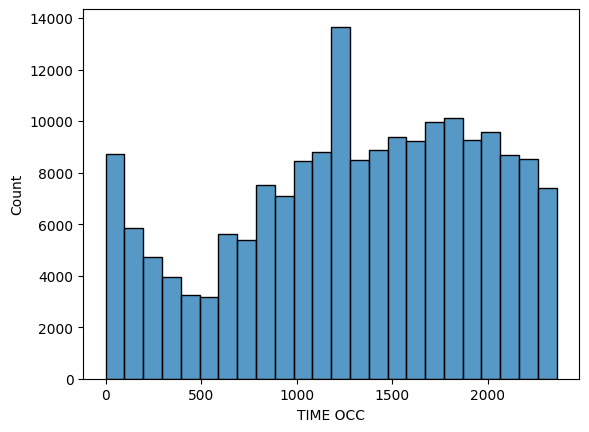

In [5]:
sns.histplot(data=crimes, x="TIME OCC", binwidth=100)
plt.show()

In [6]:
# Extract the hour from the "TIME OCC" column
crimes["HOUR OCC"] = crimes["TIME OCC"].astype(str).str[:2].astype(int)

# Calculate the frequency of each hour
freq = crimes["HOUR OCC"].value_counts()

# Find the hour with the highest frequency of crimes
peak_crime_hour = freq.idxmax()

In [7]:
print(peak_crime_hour)

12


The time with the highest frequency is 12:00 pm

In [8]:
time_location = crimes.sort_values(['AREA NAME', 'TIME OCC'], ascending=[True, False])
print(time_location)

            DR_NO  Date Rptd   DATE OCC  TIME OCC    AREA NAME  \
20866   221214219 2022-06-03 2022-06-02      2359  77th Street   
27189   221216040 2022-07-06 2022-07-03      2359  77th Street   
102119  221226122 2022-12-28 2022-02-14      2359  77th Street   
146282  231207034 2023-02-18 2023-02-18      2359  77th Street   
17281   221215963 2022-07-03 2022-07-02      2358  77th Street   
...           ...        ...        ...       ...          ...   
182579  230705066 2023-01-25 2023-01-23         1     Wilshire   
182661  230710546 2023-06-06 2023-06-03         1     Wilshire   
182719  230708844 2023-04-24 2023-04-05         1     Wilshire   
184660  230709453 2023-05-10 2023-01-11         1     Wilshire   
184754  230708922 2023-04-27 2023-04-27         1     Wilshire   

                                           Crm Cd Desc  Vict Age Vict Sex  \
20866                                THEFT OF IDENTITY        27        F   
27189                                THEFT OF IDENTIT

In [9]:
time_loc = crimes[["AREA NAME", "TIME OCC"]]
print(time_loc)

          AREA NAME  TIME OCC
0         Southwest      1110
1           Olympic      1620
2         Hollywood      1200
3       77th Street       635
4           Rampart       900
...             ...       ...
185710  N Hollywood      1100
185711     Foothill      1800
185712     Foothill      1000
185713  77th Street      1630
185714     Van Nuys       900

[185715 rows x 2 columns]


In [10]:
time_loc_sorted = time_loc.sort_values(by=['AREA NAME', 'TIME OCC'], ascending=[True, False])
time_loc_sorted.head()

,AREA NAME,TIME OCC
20866,77th Street,2359
27189,77th Street,2359
102119,77th Street,2359
146282,77th Street,2359
17281,77th Street,2358


In [11]:
late_nights = crimes[(crimes["TIME OCC"] >= 359) & (crimes["TIME OCC"] <= 2259)]
late_nights_loc = late_nights.sort_values(by="TIME OCC")
late_nights_loc.head()
late_nights_loc.shape

(155072, 13)

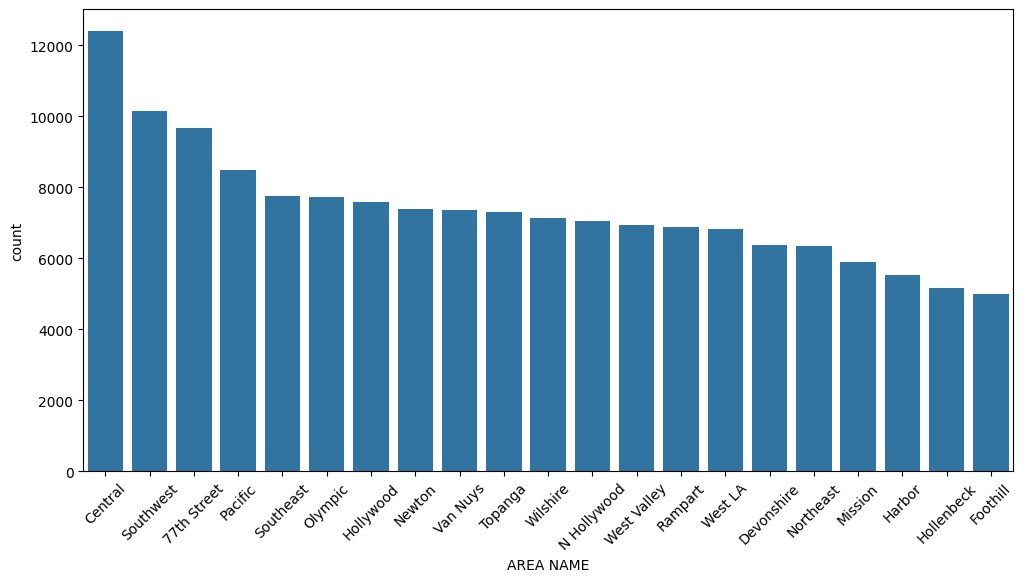

In [12]:

# Create a DataFrame with the value counts of "AREA NAME"
area_counts = late_nights_loc["AREA NAME"].value_counts().reset_index()
area_counts.columns = ["AREA NAME", "count"]

plt.figure(figsize=(12, 6))
sns.barplot(data=area_counts, x="AREA NAME", y="count")
plt.xticks(rotation=45)
plt.show()

In [13]:
peak_night_crime_location = area_counts.loc[area_counts['count'].idxmax(), 'AREA NAME']
peak_night_crime_location = str(peak_night_crime_location)
peak_night_crime_location

'Central'

In [14]:
age_bins = [0, 17, 25, 34, 44, 54, 64, 100]
age_group = ['0-17', '18-25', '26-34', '35-44', '45-54', '55-64', '65-100']
crimes['Age Group'] = pd.cut(crimes['Vict Age'], bins=age_bins, labels=age_group, right=True)
crimes['Age Group'].head()

0     26-34
1     55-64
2     26-34
3     35-44
4    65-100
Name: Age Group, dtype: category
Categories (7, object): ['0-17' < '18-25' < '26-34' < '35-44' < '45-54' < '55-64' < '65-100']

In [15]:
max_age = crimes['Vict Age'].max()

# Define age group bins and labels
bins = [0, 17, 25, 34, 44, 54, 64, max_age + 1]  # Use max_age + 1 for the last bin
labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Categorize victim ages into age groups
crimes['Age Group'] = pd.cut(crimes['Vict Age'], bins=bins, labels=labels, right=True)

# Count the number of crimes in each age group
victim_ages = crimes['Age Group'].value_counts().sort_index()

# Output the result
print(victim_ages)

Age Group
0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: count, dtype: int64


# Results
## 1. The peak crime hour reported is 12:00 pm

## 2. The peak night time (11pm - am) crime location is Los Angeles Central

## 3. Number of crimes per age group is
| Age group | No of citizens |
| ----------- | ----------- |
| 0-17 | 4528 |
| 18-25 | 28291 |
| 26-34 | 47470 |
| 35-44 | 42157 |
| 45-54 | 28353 |
| 55-64 | 20169 |
| 65+ | 14747 |

### Indicating individuals aged 26-44 suffered more than other age groups
